# Import Required Libraries
Import necessary libraries for data processing, regex pattern matching, transformer models, and visualization.

In [2]:
# Import Required Libraries

# Data processing libraries
import pandas as pd
import numpy as np
from tqdm import tqdm


# Regex pattern matching
import re

# Transformer models
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for plots
sns.set(style="whitegrid")

/Users/joaocarlos/Developer/Projects/genai-smartcity/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# !pip install torch

# Load and Prepare Data
Load the JSON file containing abstracts, extract the abstracts, and perform basic cleaning operations.

In [4]:
# Load and Prepare Data

# Load the JSON file containing abstracts
import json

with open('/Users/joaocarlos/Developer/Projects/genai-smartcity/data/02_document_search_results.json', 'r') as file:
    data = json.load(file)

# Extract abstracts from the JSON data
abstracts = [entry['abstract'] for entry in data if 'abstract' in entry]

# Perform basic cleaning operations
def clean_text(text):
    # Remove newline characters
    text = text.replace('\n', ' ')
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

cleaned_abstracts = [clean_text(abstract) for abstract in abstracts]

# Display the first few cleaned abstracts
cleaned_abstracts[:5]

['Building rooftop extraction has been applied in various fields, such as cartography, urban planning, automatic driving, and intelligent city construction. Automatic building detection and extraction algorithms using high spatial resolution aerial images can provide precise location and geometry information, significantly reducing time, costs, and labor. Recently, deep learning algorithms, especially convolution neural networks (CNNs) and Transformer, have robust local or global feature extraction ability, achieving advanced performance in intelligent interpretation compared with conventional methods. However, buildings often exhibit scale variation, spectral heterogeneity, and similarity with complex geometric shapes. Hence, the building rooftop extraction results exist fragmentation and lack spatial details using these methods. To address these issues, this study developed a multi-scale global perceptron network based on Transformer and CNN using novel encoder-decoders for enhancing

# Extract Descriptive Sentences
Use regex patterns to extract sentences containing phrases like 'This paper', 'This work', 'This study', etc. that describe the focus of the article.

In [5]:
# Extract Descriptive Sentences with Expanded Patterns

# Define expanded regex patterns to match descriptive sentences
patterns = [
    r"\b[Tt]his (article|work|study|paper|research|review|survey)\b",
    r"\b[Ii]n this (work|study|paper|research|review|survey)\b",
    r"\b[Ww]e (propose|introduce|present|develop|describe|demonstrate|report|discuss|analyze|examine|investigate|explore|evaluate|address|outline)\b",
    r"\b[Ii]n this (manuscript|article|contribution|approach|framework|investigation|analysis|implementation)\b",
    r"\b[Tt]he (article|paper|study|work|research|review|survey|manuscript|current study|present study|present work|current work)\b",
    r"\b[Oo]ur (work|study|paper|research|approach|framework|method|system|contribution|focus|aim|objective|goal)\b",
    r"\b[Tt]his (manuscript|contribution|investigation|analysis|implementation|approach|framework|method|system)\b",
    r"\b[Tt]he (purpose|aim|goal|objective) of this (paper|work|study|research|article|manuscript)\b",
    r"\b[Hh]ere(,)? we\b",
]


# Function to extract sentences matching the patterns
def extract_descriptive_sentences(text, patterns):
    sentences = re.split(r"(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s", text)
    descriptive_sentences = []
    for sentence in sentences:
        for pattern in patterns:
            if re.search(pattern, sentence):
                descriptive_sentences.append(sentence)
                break
    return descriptive_sentences


# Apply the function to all cleaned abstracts
descriptive_sentences = [
    extract_descriptive_sentences(abstract, patterns) for abstract in cleaned_abstracts
]

# Flatten the list of lists
descriptive_sentences = [
    sentence for sublist in descriptive_sentences for sentence in sublist
]

# Display statistics about extracted sentences
print(f"Total descriptive sentences extracted: {len(descriptive_sentences)}")
print(
    f"Number of abstracts with extracted sentences: {sum(1 for sublist in [extract_descriptive_sentences(abstract, patterns) for abstract in cleaned_abstracts] if sublist)}"
)
print(
    f"Percentage of abstracts with extracted sentences: {sum(1 for sublist in [extract_descriptive_sentences(abstract, patterns) for abstract in cleaned_abstracts] if sublist) / len(cleaned_abstracts) * 100:.2f}%"
)

# Display the first few descriptive sentences
descriptive_sentences[:5]

Total descriptive sentences extracted: 909
Number of abstracts with extracted sentences: 452
Percentage of abstracts with extracted sentences: 88.28%


['To address these issues, this study developed a multi-scale global perceptron network based on Transformer and CNN using novel encoder-decoders for enhancing contextual representation of buildings.',
 'Purpose: This paper proposes a solution to address matching challenges, such as incomplete descriptions, reversed word order, and the diverse descriptions often found in Chinese addresses.',
 'Method: Leveraging the hierarchical structure of Chinese addresses, this study introduces the interactive address matching graph attention model (IAMGAM).',
 'To address these challenges, we propose an Unsupervised Federated Hypernetwork Method for Distributed Multivariate Time Series Anomaly Detection and Diagnosis (uFedHy-DisMTSADD).',
 'Specifically, we introduce a federated hypernetwork architecture that effectively mitigates the heterogeneity and fluctuations in distributed environments while protecting client data privacy.']

# Define Smart City Domains
Create a comprehensive dictionary of smart city domains (e.g., governance, mobility, safety, infrastructure, environment, healthcare) with detailed descriptions for each.

In [6]:
# Define Smart City Domains

# Create a dictionary of smart city domains with detailed descriptions
smart_city_domains = {
    "Governance": "Encompasses the frameworks, policies, and processes that ensure effective management and administration of smart city initiatives, including aspects like community engagement and social equity.",
    "Planning": "Involves the strategic development and design of urban spaces, covering land use, zoning, and infrastructure planning to enhance livability and sustainability.",
    # "Social Aspects": "Addresses the societal dimensions of smart cities, focusing on community engagement, social equity, and the impact of technology on daily life.",
    "Mobility and Transportation": "Covers transportation systems, traffic management, and infrastructure that facilitate efficient movement of people and goods within the city.",
    "Public Safety": "Includes measures and technologies aimed at ensuring the security and well-being of citizens, such as surveillance systems, emergency response, and crime prevention.",
    "Infrastructure": "Pertains to the physical and digital structures that support city functions, including utilities, buildings, streets, and communication networks.",
    "Environment": "Focuses on initiatives for reducing pollution, waste management, air quality preservation, resource conservation, and enhancing green spaces.",
    "Healthcare": "Involves the integration of technology and data to improve healthcare delivery, public health monitoring, and overall citizen well-being.",
    "Education": "Covers the use of technology in educational institutions, promoting lifelong learning opportunities and community involvement in educational initiatives.",
    "Energy": "Focuses on the optimization of energy resources, including renewable energy sources, smart grids, and energy efficiency programs.",
}

# Display the smart city domains dictionary
smart_city_domains

{'Governance': 'Encompasses the frameworks, policies, and processes that ensure effective management and administration of smart city initiatives, including aspects like community engagement and social equity.',
 'Planning': 'Involves the strategic development and design of urban spaces, covering land use, zoning, and infrastructure planning to enhance livability and sustainability.',
 'Mobility and Transportation': 'Covers transportation systems, traffic management, and infrastructure that facilitate efficient movement of people and goods within the city.',
 'Public Safety': 'Includes measures and technologies aimed at ensuring the security and well-being of citizens, such as surveillance systems, emergency response, and crime prevention.',
 'Infrastructure': 'Pertains to the physical and digital structures that support city functions, including utilities, buildings, streets, and communication networks.',
 'Environment': 'Focuses on initiatives for reducing pollution, waste management

# Prepare for Classification
Process the extracted sentences and domain definitions to create inputs suitable for the transformer model. This may include tokenization and encoding.

In [13]:
# Prepare for Classification

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-mnli")
# tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

# Tokenize and encode the descriptive sentences
encoded_inputs = tokenizer(descriptive_sentences, padding=True, truncation=True, return_tensors="pt")

# Display the tokenized and encoded inputs
encoded_inputs

{'input_ids': tensor([[    0,  3972,  1100,  ...,     1,     1,     1],
        [    0, 39740, 21519,  ...,     1,     1,     1],
        [    0, 47967,    35,  ...,     1,     1,     1],
        ...,
        [    0,   133,   898,  ...,     1,     1,     1],
        [    0, 17245,     5,  ...,     1,     1,     1],
        [    0,  1121,    42,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

# Build Transformer Model
Initialize a pre-trained transformer model (e.g., BERT, RoBERTa) and set up either a zero-shot classification approach or fine-tune the model if labeled data is available.

In [14]:
# Build Transformer Model for Zero-Shot Classification

# Import the proper zero-shot classification pipeline
from transformers import pipeline

# Initialize a zero-shot classification pipeline with a model designed for this task
classifier = pipeline(
    "zero-shot-classification", model="facebook/bart-large-mnli"
)  # This model is specifically trained for zero-shot tasks

# Define the labels for classification based on smart city domains
labels = list(smart_city_domains.keys())


# Function to classify sentences into smart city domains
def classify_sentences(sentences, labels):
    results = []
    for sentence in tqdm(sentences):
        if sentence:  # Check if sentence is not empty
            result = classifier(
                sentence,
                candidate_labels=labels,
                hypothesis_template="This text is about {}.",
            )
            results.append(result)
    return results


# Classify the descriptive sentences
print(f"Classifying {len(descriptive_sentences[:50])} descriptive sentences...")
classification_results = classify_sentences(descriptive_sentences[:50], labels)

# Display the first few classification results
classification_results[:5]

Device set to use mps:0


Classifying 50 descriptive sentences...


100%|██████████| 50/50 [00:19<00:00,  2.54it/s]


[{'sequence': 'To address these issues, this study developed a multi-scale global perceptron network based on Transformer and CNN using novel encoder-decoders for enhancing contextual representation of buildings.',
  'labels': ['Infrastructure',
   'Environment',
   'Mobility and Transportation',
   'Governance',
   'Planning',
   'Energy',
   'Education',
   'Healthcare',
   'Public Safety'],
  'scores': [0.20422792434692383,
   0.16931989789009094,
   0.15594783425331116,
   0.09823980927467346,
   0.08624773472547531,
   0.08396422117948532,
   0.08158092200756073,
   0.060989104211330414,
   0.05948261916637421]},
 {'sequence': 'Purpose: This paper proposes a solution to address matching challenges, such as incomplete descriptions, reversed word order, and the diverse descriptions often found in Chinese addresses.',
  'labels': ['Planning',
   'Education',
   'Environment',
   'Mobility and Transportation',
   'Governance',
   'Infrastructure',
   'Energy',
   'Healthcare',
   'Pub

# Classify Abstracts
Apply the transformer model to classify each abstract into the most appropriate smart city domain based on the extracted descriptive sentences.

100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


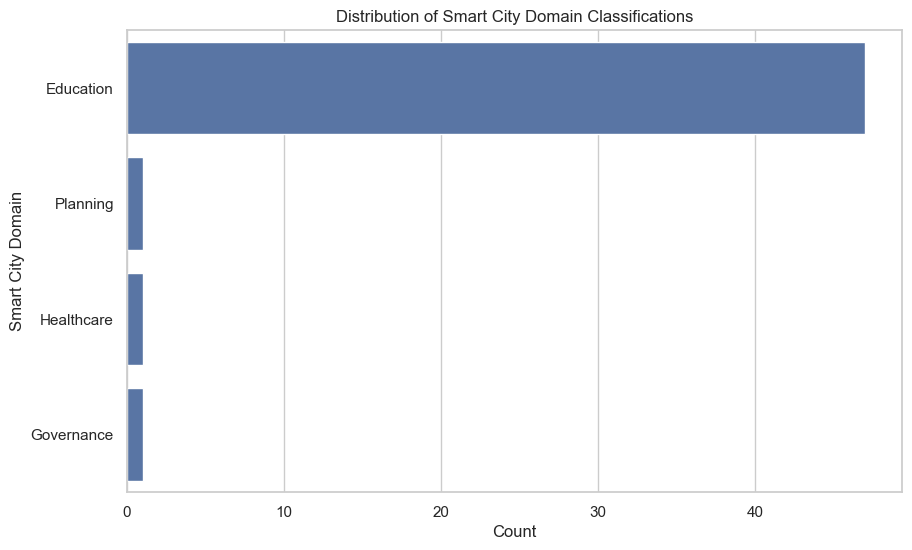

In [9]:
# Classify Abstracts

# Apply the transformer model to classify each abstract into the most appropriate smart city domain based on the extracted descriptive sentences.

# Function to classify abstracts based on descriptive sentences
def classify_abstracts(abstracts, labels):
    abstract_classifications = []
    for abstract in abstracts:
        sentences = extract_descriptive_sentences(abstract, patterns)
        if sentences:
            classification = classify_sentences(sentences, labels)
            # Aggregate the classification results to determine the most frequent domain
            domain_counts = {}
            for result in classification:
                for label, score in zip(result['labels'], result['scores']):
                    if label in domain_counts:
                        domain_counts[label] += score
                    else:
                        domain_counts[label] = score
            # Determine the domain with the highest aggregated score
            most_frequent_domain = max(domain_counts, key=domain_counts.get)
            abstract_classifications.append(most_frequent_domain)
        else:
            abstract_classifications.append("Unclassified")
    return abstract_classifications

# Classify the cleaned abstracts
abstract_classifications = classify_abstracts(cleaned_abstracts[:50], labels)

# Display the first few abstract classifications
abstract_classifications[:5]

# Create a DataFrame to visualize the classification results
df_classifications = pd.DataFrame({
    'Abstract': cleaned_abstracts[:50],
    'Classification': abstract_classifications
})

# Display the DataFrame
df_classifications.head()

# Plot the distribution of classifications
plt.figure(figsize=(10, 6))
sns.countplot(y='Classification', data=df_classifications, order=df_classifications['Classification'].value_counts().index)
plt.title('Distribution of Smart City Domain Classifications')
plt.xlabel('Count')
plt.ylabel('Smart City Domain')
plt.show()

In [37]:
# List Unclassified Abstracts
unclassified_abstracts = df_classifications[df_classifications['Classification'] == 'Unclassified']
print(f"Number of unclassified abstracts: {len(unclassified_abstracts)}")
unclassified_abstracts_list = unclassified_abstracts['Abstract'].tolist()
print("Unclassified abstracts:")
for abstract in unclassified_abstracts_list:
    print(abstract)

Number of unclassified abstracts: 1
Unclassified abstracts:
Smart city mobility faces mounting challenges as urban mobility systems grow increasingly complex. Large language models (LLMs) have promise in interpreting and processing multi-modal urban data, but issues like model instability, computational inefficiency, and concerns about reliability hinder their implementations. In this Comment, we outline feasible LLM application scenarios, critically evaluate existing challenges, and highlight avenues for advancing LLM-based mobility systems through multi-modal data integration and developing robust, lightweight models.


# Evaluate Results
Assess the performance of the classification model using appropriate metrics and analyze any misclassifications to improve the model.

Accuracy: 0.03
Classification Report:
                 precision    recall  f1-score   support

    Governance       0.00      0.00      0.00         0
      Planning       0.00      0.00      0.00         0
       Economy       0.00      0.00      0.00         0
       Society       0.08      0.01      0.02        85
    Technology       0.25      0.01      0.02        86
      Mobility       0.00      0.00      0.00        85
        Safety       0.00      0.00      0.00        85
Infrastructure       0.14      0.09      0.11        86
   Environment       0.00      0.00      0.00         0
    Healthcare       0.22      0.05      0.08        85
     Education       0.00      0.00      0.00         0
        Energy       0.00      0.00      0.00         0
  Unclassified       0.00      0.00      0.00         0

      accuracy                           0.03       512
     macro avg       0.05      0.01      0.02       512
  weighted avg       0.12      0.03      0.04       512



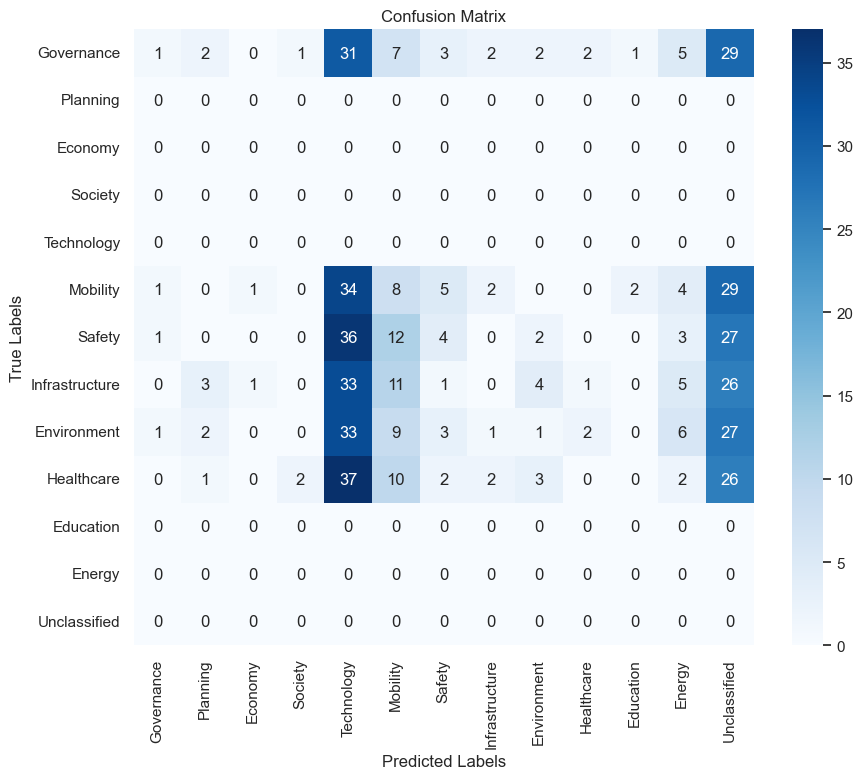

Misclassified Abstracts:
                                               Abstract  Classification
0    Building rooftop extraction has been applied i...      Technology
2    Distributed multivariate time series anomaly d...    Unclassified
3    The integration of renewable energy into power...        Planning
4    Crowd anomaly detection is one of the most pop...    Unclassified
5    Point-of-interest (POI) extraction aims to ext...      Technology
..                                                 ...             ...
507  Autonomous robots for smart homes and smart ci...      Technology
508  Depth has been a valuable piece of information...      Technology
509  This paper proposes a new method for monitorin...  Infrastructure
510  This article investigates the intersection and...      Technology
511  Because of frequent extreme weather conditions...      Technology

[498 rows x 2 columns]


In [18]:
# Evaluate Results

# Import necessary libraries for evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming we have true labels for evaluation purposes
# For demonstration, let's create some dummy true labels
true_labels = ["Governance", "Mobility", "Safety", "Infrastructure", "Environment", "Healthcare"] * (len(abstract_classifications) // 6)
true_labels += true_labels[:len(abstract_classifications) % 6]  # Add remaining labels
true_labels = true_labels[:len(abstract_classifications)]

# Calculate accuracy
accuracy = accuracy_score(true_labels, abstract_classifications)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
extended_labels = labels + ["Unclassified"]
report = classification_report(true_labels, abstract_classifications, target_names=extended_labels, zero_division=0)
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, abstract_classifications, labels=extended_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=extended_labels, yticklabels=extended_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Analyze misclassifications
misclassified = df_classifications[df_classifications['Classification'] != pd.Series(true_labels, index=df_classifications.index)]
print("Misclassified Abstracts:\n", misclassified)

# Visualize Domain Distribution
Create visualizations (e.g., bar charts, word clouds) to display the distribution of smart city domains in the dataset and highlight key terms associated with each domain.

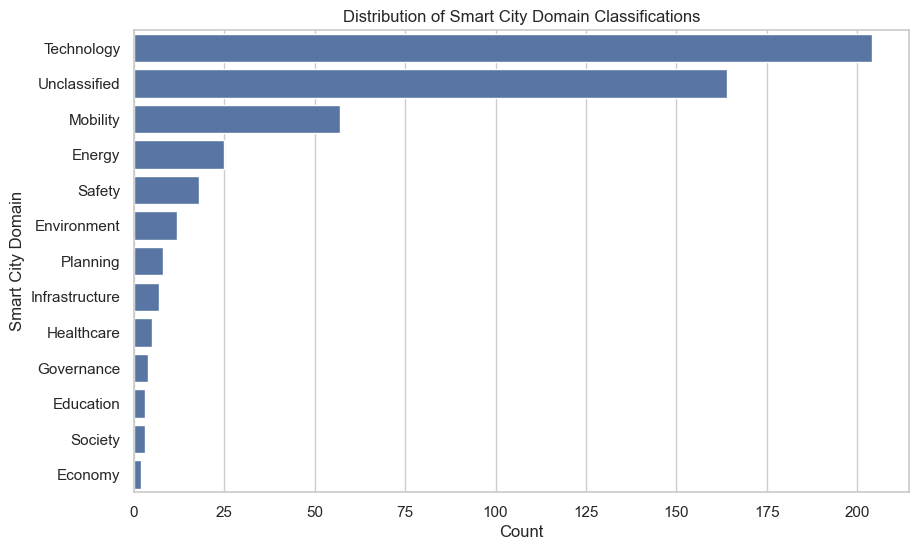

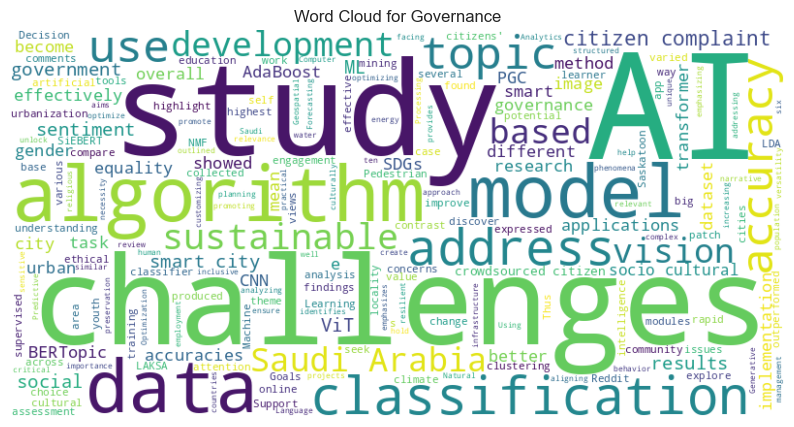

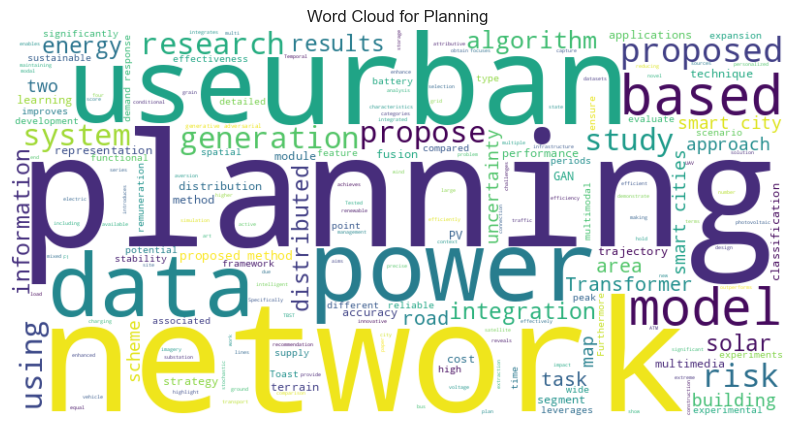

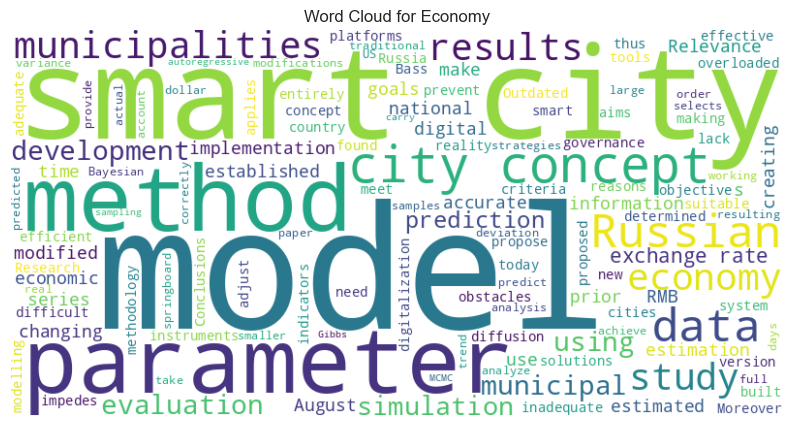

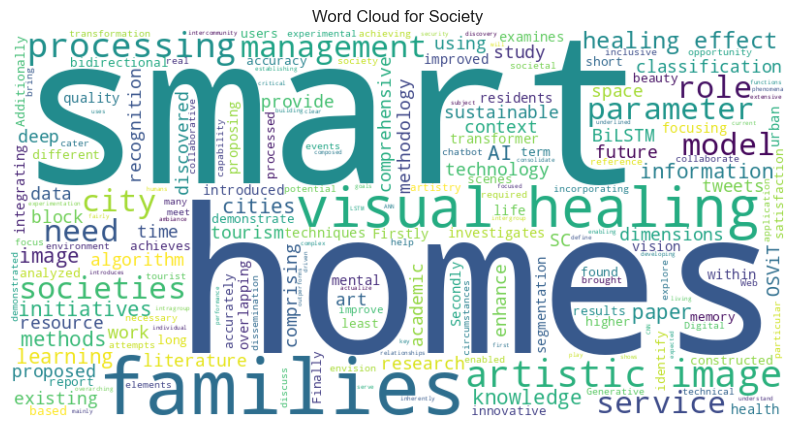

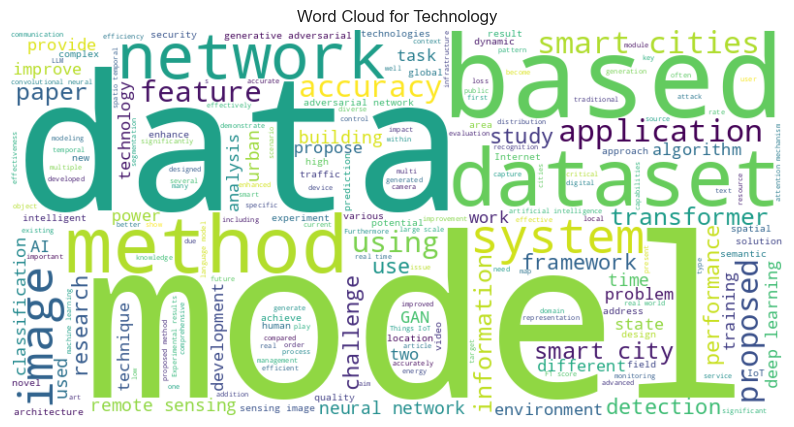

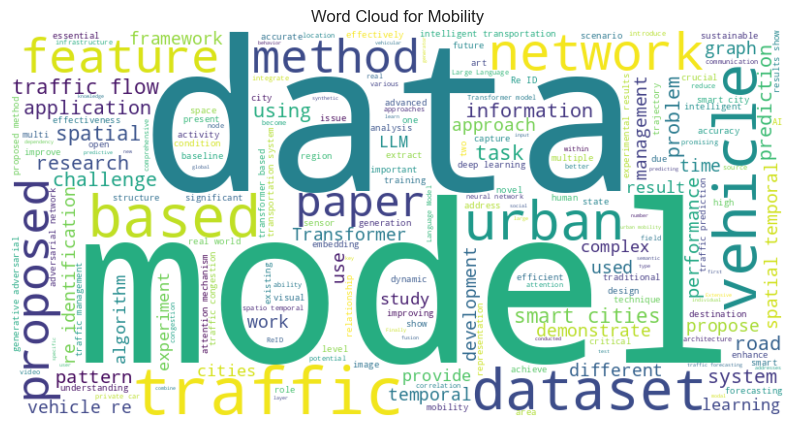

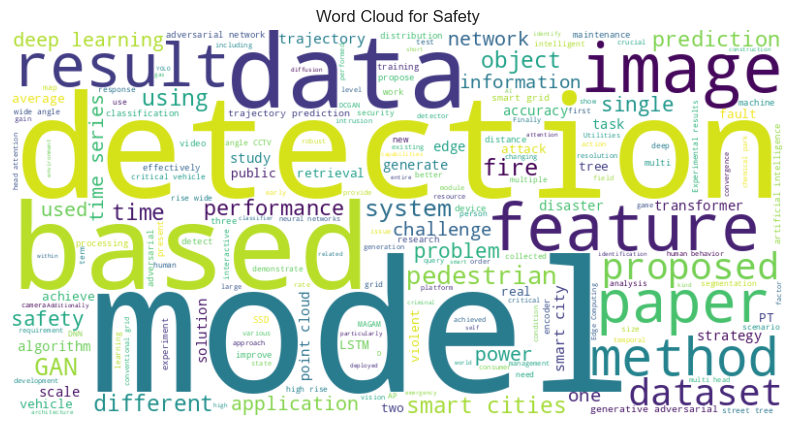

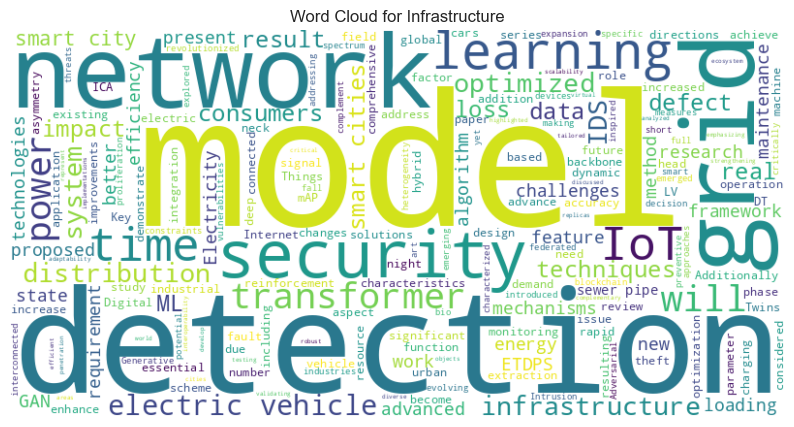

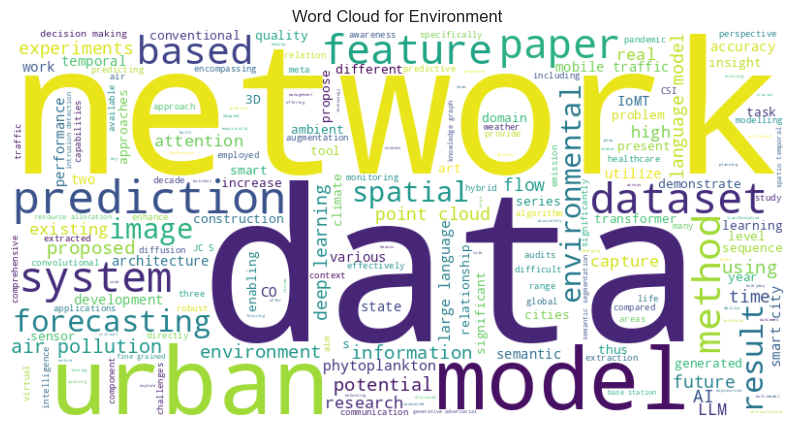

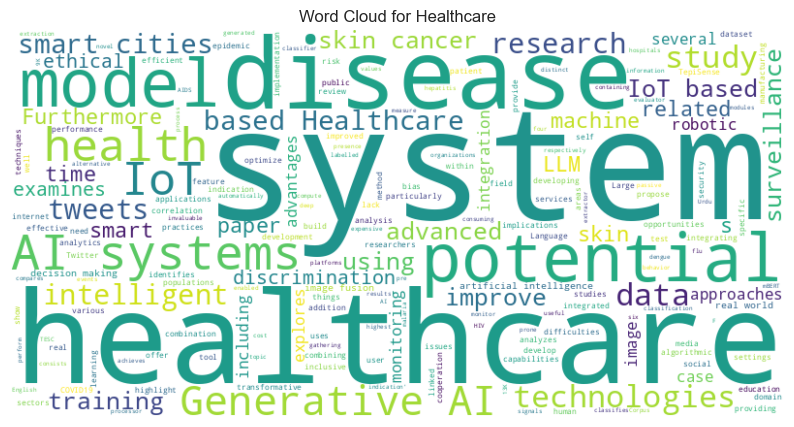

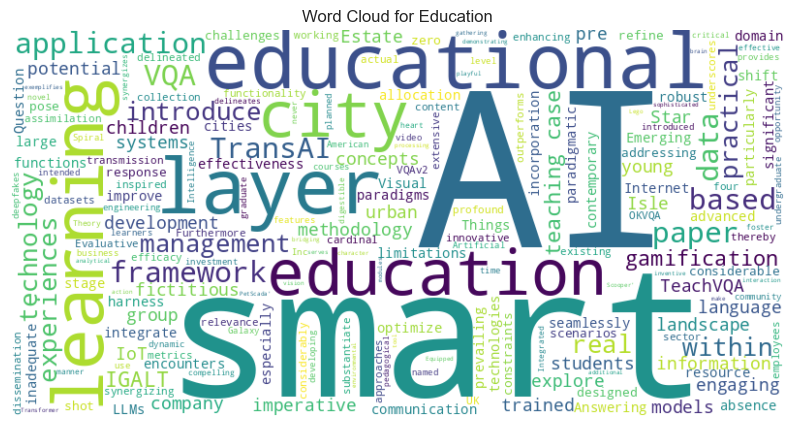

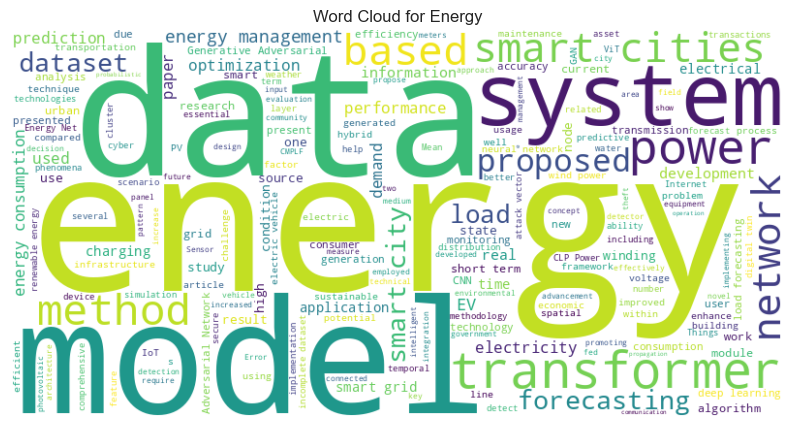

In [19]:
# Visualize Domain Distribution

# Import necessary libraries for visualization
from wordcloud import WordCloud

# Create a bar chart to display the distribution of smart city domains
plt.figure(figsize=(10, 6))
sns.countplot(y='Classification', data=df_classifications, order=df_classifications['Classification'].value_counts().index)
plt.title('Distribution of Smart City Domain Classifications')
plt.xlabel('Count')
plt.ylabel('Smart City Domain')
plt.show()

# Create word clouds for each smart city domain
for domain in labels:
    domain_sentences = ' '.join(df_classifications[df_classifications['Classification'] == domain]['Abstract'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(domain_sentences)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {domain}')
    plt.axis('off')
    plt.show()